In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set_theme(style="ticks", color_codes=True)
#import math
pd.set_option('display.max_rows', None)

# __Load Data__

In [140]:
#Load all data
ph_results_df = pd.read_csv('finalResults_Ph.csv')
vr_results_df = pd.read_csv('finalResults_VR.csv')
ph_results_part_invalid_df = pd.read_csv('finalResults_part_invalid_Ph.csv')
vr_results_part_invalid_df = pd.read_csv('finalResults_part_invalid_VR.csv')
#Merge ph_results_df with ph_results_part_invalid_df
ph_results_df = ph_results_df.append(ph_results_part_invalid_df)
vr_results_df = vr_results_df.append(vr_results_part_invalid_df)
#Store as csv
#ph_results_df.to_csv('finalResults_Ph_all.csv')
#vr_results_df.to_csv('finalResults_VR_all.csv')

online_responses_df = pd.read_csv('..\\OnlineSurvey\\BuzzwireOnlineResponses.csv')

vr_results_df.drop(['Unnamed: 0'], axis=1, inplace=True)
ph_results_df.drop(['Unnamed: 0'], axis=1, inplace=True)

vr_results_df['Condition'] = 'VR'
ph_results_df['Condition'] = 'Physical'

vr_results_df['Participant_ID'] = vr_results_df['Participant_ID'].str.upper()
ph_results_df['Participant_ID'] = ph_results_df['Participant_ID'].str.upper()
online_responses_df['Participant_ID'] = online_responses_df['Participant_ID'].str.upper()



# __Process and Clean Data for Statistics__

In [141]:
#Normalize the data
def normalize_signals(df):

    df['Norm_Pretest_HR'] = (df['Pretest_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Pretest_GSR'] = (df['Pretest_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Pretest_GSR_Peaks_Rate'] = (df['Pretest_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Level_1_HR'] = (df['Level_1_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Level_1_GSR'] = (df['Level_1_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Level_1_GSR_Peaks_Rate'] = (df['Level_1_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Level_2_HR'] = (df['Level_2_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Level_2_GSR'] = (df['Level_2_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Level_2_GSR_Peaks_Rate'] = (df['Level_2_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Level_3_HR'] = (df['Level_3_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Level_3_GSR'] = (df['Level_3_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Level_3_GSR_Peaks_Rate'] = (df['Level_3_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Level_4_HR'] = (df['Level_4_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Level_4_GSR'] = (df['Level_4_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Level_4_GSR_Peaks_Rate'] = (df['Level_4_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Posttest_HR'] = (df['Posttest_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Posttest_GSR'] = (df['Posttest_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Posttest_GSR_Peaks_Rate'] = (df['Posttest_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    

#Difference between pre-test and post-test time/mistakes in a new column
def calculate_gains(df):
    df['Time_Gain'] = df['Pretest_Time'] - df['Posttest_Time'] #More time gain = better performance
    df['Mistake_Gain'] = df['Pretest_Mistake_Time'] - df['Posttest_Mistake_Time'] #More time gain = better performance

#Calculate mean normalized HR across 4 training levels
def calculate_mean_training_hr(df):
    df['Mean_Norm_Training_HR'] = (df['Norm_Level_1_HR'] + df['Norm_Level_2_HR'] + df['Norm_Level_3_HR'] + df['Norm_Level_4_HR']) / 4

#Calculate mean normalized HR across 4 training levels
def calculate_mean_training_rmssd(df):
    df['Mean_Training_RMSSD'] = (df['Level_1_RMSSD'] + df['Level_2_RMSSD'] + df['Level_3_RMSSD'] + df['Level_4_RMSSD']) / 4

def calculate_mean_training_sdnn(df):
    df['Mean_Training_SDNN'] = (df['Level_1_SDNN'] + df['Level_2_SDNN'] + df['Level_3_SDNN'] + df['Level_4_SDNN']) / 4

def calculate_mean_training_lfhfratio(df):
    df['Mean_Training_LFHF_Ratio'] = (df['Level_1_LFHF_Ratio'] + df['Level_2_LFHF_Ratio'] + df['Level_3_LFHF_Ratio'] + df['Level_4_LFHF_Ratio']) / 4

def calculate_mean_training_hfn(df):
    df['Mean_Training_HFN'] = (df['Level_1_HFN'] + df['Level_2_HFN'] + df['Level_3_HFN'] + df['Level_4_HFN']) / 4

#Calculate mean normalized GSR across 4 training levels    
def calculate_mean_training_gsr(df):
    df['Mean_Norm_Training_GSR'] = (df['Norm_Level_1_GSR'] + df['Norm_Level_2_GSR'] + df['Norm_Level_3_GSR'] + df['Norm_Level_4_GSR']) / 4

def calculate_mean_training_gsr_peaks_rate(df):
    df['Mean_Norm_Training_GSR_Peaks_Rate'] = (df['Norm_Level_1_GSR_Peaks_Rate'] + df['Norm_Level_2_GSR_Peaks_Rate'] + df['Norm_Level_3_GSR_Peaks_Rate'] + df['Norm_Level_4_GSR_Peaks_Rate']) / 4

def calculate_mean_training_gsr_peak_amplitude(df):
    df['Mean_Training_GSR_Peak_Amplitude'] = df[["Level_1_GSR_Mean_Peak_Amplitude", "Level_2_GSR_Mean_Peak_Amplitude","Level_3_GSR_Mean_Peak_Amplitude","Level_4_GSR_Mean_Peak_Amplitude"]].mean(axis=1, skipna=True) #np.nansum([df['Level_1_GSR_Peak_Amplitude'], df['Level_2_GSR_Peak_Amplitude'], df['Level_3_GSR_Peak_Amplitude'], df['Level_4_GSR_Peak_Amplitude']) / 4       

def calculate_self_efficacy_gain(df):
    df['Eff_Diff'] = df['Self_Efficacy_2'] - df['Self_Efficacy_1']

def calculate_nasa_tlx_score(df):
    df['NASA_TLX_Score'] = df['Mental Demand'] + df['Physical Demand'] + df['Temporal Demand'] + df['Performance'] + df['Effort'] + df['Frustration']    



In [142]:
normalize_signals(ph_results_df)
normalize_signals(vr_results_df)

calculate_gains(ph_results_df)
calculate_gains(vr_results_df)

calculate_mean_training_hr(ph_results_df)
calculate_mean_training_hr(vr_results_df)

calculate_mean_training_gsr(ph_results_df)
calculate_mean_training_gsr(vr_results_df)

calculate_mean_training_rmssd(ph_results_df)
calculate_mean_training_rmssd(vr_results_df)

calculate_mean_training_sdnn(ph_results_df)
calculate_mean_training_sdnn(vr_results_df)

calculate_mean_training_lfhfratio(ph_results_df)
calculate_mean_training_lfhfratio(vr_results_df)

calculate_mean_training_hfn(ph_results_df)
calculate_mean_training_hfn(vr_results_df)

calculate_mean_training_gsr_peaks_rate(ph_results_df)
calculate_mean_training_gsr_peaks_rate(vr_results_df)

calculate_mean_training_gsr_peak_amplitude(ph_results_df)
calculate_mean_training_gsr_peak_amplitude(vr_results_df)



In [143]:
combined_results_df = pd.concat([vr_results_df, ph_results_df], axis=0)
#Merge the online responses with the combined results DF (sensor data)
combined_results_df = pd.merge(combined_results_df, online_responses_df, on='Participant_ID', how='outer')
#combined_results_df.to_csv('combinedResults.csv')
calculate_self_efficacy_gain(combined_results_df)
calculate_nasa_tlx_score(combined_results_df)

In [145]:
#combined_results_df.loc[ combined_results_df["Presence1"] == "Somewhat\n  Disagree", "Presence1"] = "Somewhat Disagree"
#combined_results_df.replace({"Presence1": {"Somewhat\n  Disagree": "Somewhat Disagree"}}, inplace=True)
combined_results_df.replace("Somewhat\n  Disagree", "Somewhat Disagree", inplace=True)
combined_results_df.replace("Somewhat\nDisagree", "Somewhat Disagree", inplace=True)
combined_results_df.replace("Strongly\n  Agree", "Strongly Agree", inplace=True)
combined_results_df.replace("Strongly\nAgree", "Strongly Agree", inplace=True)
combined_results_df.replace("Strongly\n  Disagree", "Strongly Disagree", inplace=True)
combined_results_df.replace("Strongly\nDisagree", "Strongly Disagree", inplace=True)
combined_results_df.replace("Somewhat\n  Agree", "Somewhat Agree", inplace=True)
combined_results_df.replace("Somewhat\nAgree", "Somewhat Agree", inplace=True)

#Replace all 'Strongly Agree' in combined_results_df with 7
combined_results_df.replace(
           {"Strongly Disagree"         : 1,
            "Disagree"                  : 2,
            "Somewhat Disagree"         : 3,
            "Neither Agree or Disagree" : 4,
            "Somewhat Agree"            : 5,
            "Agree"                     : 6,
            "Strongly Agree"            : 7}, inplace=True)

In [146]:
#Find nan values in the column 'Condition' in combined_results_df 
#combined_results_df.loc[combined_results_df["Condition"].isnull(), ["Condition", "Participant_ID"]]

combined_results_df.loc[combined_results_df["Participant_ID"].str.startswith("2C"), "Condition"] = "VR"
combined_results_df.loc[combined_results_df["Participant_ID"].str.startswith("2D"), "Condition"] = "Physical"

In [86]:
#Combined score metric 
#ph_results_df['Norm_Pretest_Score'] = 1 / np.sqrt(ph_results_df['Pretest_Time'] * ph_results_df['Pretest_Mistake_Time'])
#ph_results_df['Norm_Level_1_Score'] = 1 / np.sqrt(ph_results_df['Level_1_Time'] * ph_results_df['Level_1_Mistake_Time'])
#ph_results_df['Norm_Level_2_Score'] = 1 / np.sqrt(ph_results_df['Level_2_Time'] * ph_results_df['Level_2_Mistake_Time'])
#ph_results_df['Norm_Level_3_Score'] = 1 / np.sqrt(ph_results_df['Level_3_Time'] * ph_results_df['Level_3_Mistake_Time'])
#ph_results_df['Norm_Level_4_Score'] = 1 / np.sqrt(ph_results_df['Level_4_Time'] * ph_results_df['Level_4_Mistake_Time'])

In [147]:
combined_results_df.rename(columns=
                            {'Mean_Norm_Training_HR' : 'Mean HR (Training)', 
                            'Mean_Training_RMSSD': 'Mean RMSSD (Training)', 
                            'Mean_Training_SDNN': 'Mean SDNN (Training)', 
                            'Mean_Norm_Training_GSR_Peaks_Rate': 'Mean GSR Peaks Rate (Training)', 
                            'Mean_Training_LFHF_Ratio': 'Mean LFHF Ratio (Training)', 
                            'Time_Gain':'Task Completion Time (Gain)', 
                            'Mistake_Gain':'Mistake Time (Gain)', 
                            'Mean_Norm_Training_GSR' : 'Mean GSR (Training)',  
                            'Mean_Training_HFN' : 'Mean HF Normalized (Training)', 
                            'Mean_Training_GSR_Peak_Amplitude' : 'Mean GSR Peak Amplitude (Training)'}, inplace=True)

In [148]:
combined_results_df['Mistake Time Score'] = pd.qcut(combined_results_df['Mistake Time (Gain)'] , 10, labels=[1,2,3,4,5,6,7,8,9,10])
combined_results_df['Task Time Score'] = pd.qcut(combined_results_df['Task Completion Time (Gain)'] , 10, labels=[1,2,3,4,5,6,7,8,9,10])

In [89]:
#combined_results_df['Mistake Time (Gain)'].hist(bins=10)
#combined_results_df['Task Completion Time (Gain)'].hist(bins=10)

In [149]:
#combined_results_df['Mistake Time Score'].hist(bins=10)
#combined_results_df['Mistake Time Score'] = pd.factorize(combined_results_df['Mistake Time Score'])[0]
#combined_results_df['Task Time Score'] = pd.factorize(combined_results_df['Task Time Score'])[0]
combined_results_df['Combined Performance Score'] = combined_results_df['Mistake Time Score'].astype(float) * 2 + combined_results_df['Task Time Score'].astype(float) 


In [150]:
combined_results_df[['Mistake Time (Gain)','Mistake Time Score','Task Completion Time (Gain)','Task Time Score', 'Combined Performance Score']]

,Mistake Time (Gain),Mistake Time Score,Task Completion Time (Gain),Task Time Score,Combined Performance Score
0,1.102615,6,-7.304108,1,13.0
1,1.315105,7,17.168940,10,24.0
2,2.956831,10,1.555000,6,26.0
3,3.965447,10,0.022085,5,25.0
4,2.099233,9,7.862500,9,27.0
5,-0.433415,1,-4.778246,3,5.0
6,-1.928079,1,-19.471416,1,3.0
7,-0.218033,2,-8.331839,1,5.0
8,0.487464,4,-6.236358,2,10.0
9,-0.219895,2,-6.552084,2,6.0


In [151]:
ph_results_df = combined_results_df[combined_results_df['Condition'] == 'Physical']
vr_results_df = combined_results_df[combined_results_df['Condition'] == 'VR']

In [ ]:
def check_normality_all_features(df):
    for column in df.columns:
        #print(column,' ', df[column].notna().value_counts())
        if column != 'Participant_ID':        
            if stats.shapiro(df[df[column].notna()][column]).pvalue < 0.05:
                print(column,' is not normally distributed')
            else:
                print('** ',column,' is normally distributed')
print("Shapiro test for normality (Not normal if p-value is less than 0.05)")
print("VR")
print('----')
check_normality_all_features(vr_results_df)
print("Physical")
print('--------')
check_normality_all_features(ph_results_df)

#for column in ['Baseline_GSR', 'Norm_Pretest_GSR' , 'Norm_Level_1_GSR', 'Norm_Level_2_GSR', 'Norm_Level_3_GSR', 'Norm_Level_4_GSR', 'Norm_Posttest_GSR', 'Baseline_HR', 'Norm_Pretest_HR' , 'Norm_Level_1_HR', 'Norm_Level_2_HR', 'Norm_Level_3_HR', 'Norm_Level_4_HR', 'Norm_Posttest_HR', 'Pretest_Time', 'Pretest_Mistake_Time', 'Posttest_Time', 'Posttest_Mistake_Time']:
#    print(column, " - shapiro test p-value less than 0.05 - ", stats.shapiro(ph_results_df[ph_results_df[column].notna()][column]).pvalue < 0.05) #Not normal if p-value is less than 0.05

In [152]:
combined_results_df.to_csv('combinedResults.csv')

# __Performance gain__
-----------------

## __Performance gain - Within Physical and VR__

In the VR condition, there is a decrease of 1.34s in the mean task completion time from pre-training to post-training phases, though a Wilcoxon signed-rank test showed no statistical significance (α = 0.05, p=0.403, w=366.0). However in VR, a statistically significant decrease of 1.21s in the mistake time from pre to post-training (α = 0.05, p<0.001, w=126.0) is observed. 

In [11]:
#Mean of pre-test and post-test time
print("\nMean of pre-test and post-test time in physical condition\n-------------------------------------")
print(round(ph_results_df['Pretest_Time'].mean(skipna=True),2), round(ph_results_df['Posttest_Time'].mean(skipna=True),2))
#Wilcoxon test for pre-test and post-test time
print("Wilcoxon test for pre-test and post-test time in physical condition")
print(stats.wilcoxon(ph_results_df['Pretest_Time'], ph_results_df['Posttest_Time']))

#Mean of pre-test and post-test mistake time in physical condition
print("\nMean of pre-test and post-test mistake time in physical condition\n-------------------------------------")
print(round(ph_results_df['Pretest_Mistake_Time'].mean(skipna=True),2), round(ph_results_df['Posttest_Mistake_Time'].mean(skipna=True),2))
#Wilcoxon test for pre-test mistake and post-test mistake time
print("Wilcoxon test for pre-test mistake and post-test mistake time in physical condition")
print(stats.wilcoxon(ph_results_df['Pretest_Mistake_Time'], ph_results_df['Posttest_Mistake_Time']))


#Mean of pre-test and post-test time
print("\nMean of pre-test and post-test time in VR condition\n-------------------------------------")
print(round(vr_results_df['Pretest_Time'].mean(skipna=True),2), round(vr_results_df['Posttest_Time'].mean(skipna=True),2))
#Wilcoxon test for pre-test and post-test time
print("Wilcoxon test for pre-test and post-test time in VR condition")
print(stats.wilcoxon(vr_results_df['Pretest_Time'], vr_results_df['Posttest_Time']))

#Mean of pre-test and post-test mistake time in physical condition
print("\nMean of pre-test and post-test mistake time in VR condition\n-------------------------------------")
print(round(vr_results_df['Pretest_Mistake_Time'].mean(skipna=True),2), round(vr_results_df['Posttest_Mistake_Time'].mean(skipna=True),2))
#Wilcoxon test for pre-test mistake and post-test mistake time
print("Wilcoxon test for pre-test mistake and post-test mistake time in VR condition")
print(stats.wilcoxon(vr_results_df['Pretest_Mistake_Time'], vr_results_df['Posttest_Mistake_Time']))


Mean of pre-test and post-test time in physical condition
-------------------------------------
20.72 21.55
Wilcoxon test for pre-test and post-test time in physical condition
WilcoxonResult(statistic=387.0, pvalue=0.9666063228557329)

Mean of pre-test and post-test mistake time in physical condition
-------------------------------------
3.22 2.15
Wilcoxon test for pre-test mistake and post-test mistake time in physical condition
WilcoxonResult(statistic=64.0, pvalue=5.381716402386978e-06)

Mean of pre-test and post-test time in VR condition
-------------------------------------
24.7 23.37
Wilcoxon test for pre-test and post-test time in VR condition
WilcoxonResult(statistic=352.0, pvalue=0.4356291562728627)

Mean of pre-test and post-test mistake time in VR condition
-------------------------------------
4.24 2.99
Wilcoxon test for pre-test mistake and post-test mistake time in VR condition
WilcoxonResult(statistic=114.0, pvalue=6.931525704115409e-05)


## __Performance gain - Physical x VR__


In order for performance in both conditions to be compared to each other, both gains in task completion time/mistake time are calculated (Table 1). The mean gain in task completion time for the VR condition (1.34s ± 8.46) is bigger than the mean gain in the physical condition (-0.05s ±8.8). Since the metrics from both these conditions are non-normally distributed, we perform a Mann-Whitney U test to find that this difference in gains is not statistically significant (α = 0.05, p=0.34, U = 778). The mean gain in mistake time in the VR condition (1.21s ± 2.03) is slightly more than the physical condition (1.02s ± 1.14) but the difference is not statistically significant (α = 0.05, p=0.47, U = 811   ). 

In [108]:
#VR vs Physical
print("\nVR vs Physical in performance gain\n-------------------------------------")

print("\nMean Task Completion Time gain in physical vs VR condition")
print(round(ph_results_df['Task Completion Time (Gain)'].mean(skipna=True),2), round(vr_results_df['Task Completion Time (Gain)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Task Completion Time (Gain)'], y=vr_results_df['Task Completion Time (Gain)'], alternative = 'less'))

print('\nMistake gain in physical vs VR condition')
print(round(ph_results_df['Mistake Time (Gain)'].mean(skipna=True),2), round(vr_results_df['Mistake Time (Gain)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mistake Time (Gain)'], y=vr_results_df['Mistake Time (Gain)'], alternative = 'less'))

print('\nCombined Performance gain in physical vs VR condition')
print(round(ph_results_df['Combined Performance Score'].mean(skipna=True),2), round(vr_results_df['Combined Performance Score'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Combined Performance Score'], y=vr_results_df['Combined Performance Score'], alternative = 'less'))


VR vs Physical in performance gain
-------------------------------------

Mean Task Completion Time gain in physical vs VR condition
-0.83 1.33
Statistical significance -  MannwhitneyuResult(statistic=722.0, pvalue=0.2864335931288994)

Mistake gain in physical vs VR condition
1.06 1.24
Statistical significance -  MannwhitneyuResult(statistic=773.0, pvalue=0.4745895252655665)

Combined Performance gain in physical vs VR condition
16.28 16.68
Statistical significance -  MannwhitneyuResult(statistic=747.5, pvalue=0.3765806752353321)


# __Biosignals__ 
-----------------

## __Biosignals - Physical x VR__ 

Literature (HRV)
---
__An Overview of Heart Rate Variability Metrics and Norms__

Lower HF power is correlated with stress, panic, anxiety, or worry. (Shaffer 2017)
The SDNN is more accurate when calculated over 24 h than during the shorter periods monitored during biofeedback sessions.
pnn50 is correlated with the RMSSD and HF power. However, the RMSSD typically provides a better assessment of RSA (especially in older subjects) and most researchers prefer it to the pNN50 (35). This may be a more reliable index than short-term SDNN measurements for the brief samples used in biofeedback.

Shaffer, F., & Ginsberg, J. P. (2017). An Overview of Heart Rate Variability Metrics and Norms. Frontiers in public health, 5, 258. https://doi.org/10.3389/fpubh.2017.00258


__Perceived Mental Stress and Reactions in Heart Rate Variability—A Pilot Study Among Employees of an Electronics Company__

The root mean square of differences between successive rhythm-to-rhythm (RR) intervals
(RMSSD) describes short-term HR variations. A low value indicates high stress.

High LF indicates high stress and high HF indicates low stress.

Reetta Orsila, Matti Virtanen, Tiina Luukkaala, Mika Tarvainen, Pasi Karjalainen, Jari Viik, Minna Savinainen & Clas-Håkan Nygård (2008) Perceived Mental Stress and Reactions in Heart Rate Variability—A Pilot Study Among Employees of an Electronics Company, International Journal of Occupational Safety and Ergonomics, 14:3, 275-283, DOI: 10.1080/10803548.2008.11076767

Literature (GSR)
---



-----------------------------------

Biosensor data in the form of GSR signals (from the Shimmer) and HR signals (from the polar H10) recorded during the training phase are both normalized to the baseline data using the following formulas inspired by Wiederhold et al. [25] - 
Normalized HR = (Mean HR – MeanBaseline HR) / MeanBaseline HR
Normalized GSR = (Mean GSR – MeanBaseline GSR) / MeanBaseline GSR
The mean GSR across all training levels in the VR condition is 2.7 (microsiemens), which is lower than the mean GSR from the physical condition, 3.32. However this difference is not statistically significant (α = 0.05, p = 0.127, U = 542). The mean HR across all training levels in the VR condition is 73.21, which is slightly lower than the mean HR of the physical condition. This different is also not statistically significant (α = 0.05, p = 0.297, U = 596).


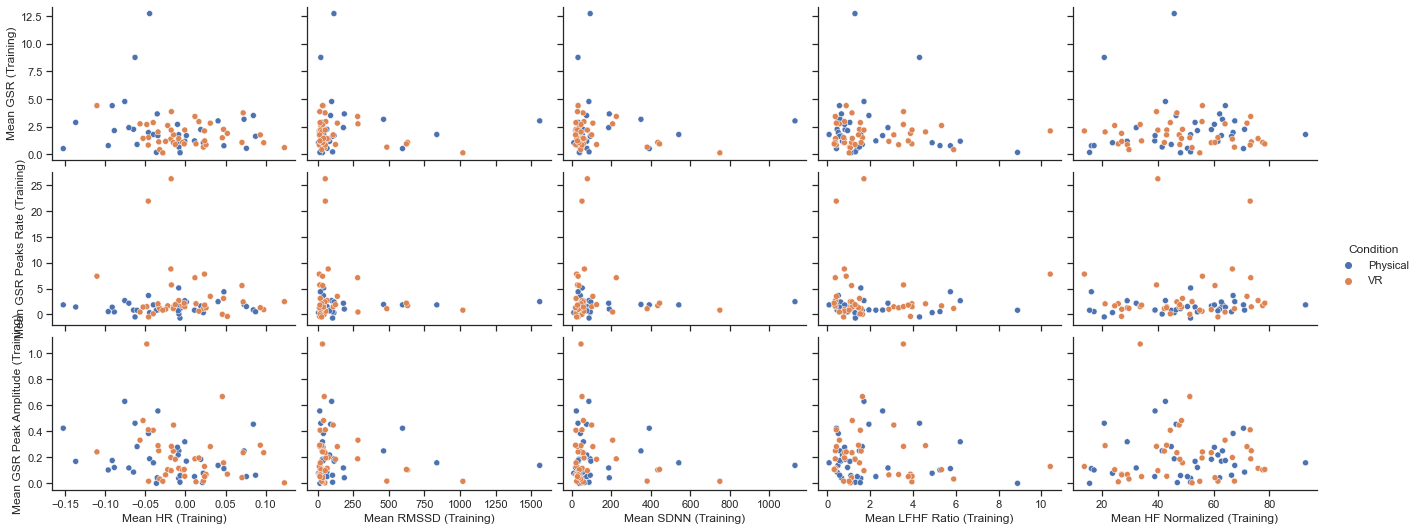

In [160]:
sns.pairplot(
    combined_results_df,
    x_vars=['Mean HR (Training)', "Mean RMSSD (Training)", "Mean SDNN (Training)", "Mean LFHF Ratio (Training)", "Mean HF Normalized (Training)"],
    y_vars=["Mean GSR (Training)", "Mean GSR Peaks Rate (Training)", "Mean GSR Peak Amplitude (Training)"],
    aspect=1.5,
    hue='Condition'
)

In [13]:
print('HR \n-----')
#Mean HR
print("\nMean of HR in physical vs VR condition")
print(round(ph_results_df['Mean HR (Training)'].mean(skipna=True),2), round(vr_results_df['Mean HR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean HR (Training)'].dropna(), y=vr_results_df['Mean HR (Training)'].dropna(), alternative = 'greater'))

#RMSSD
print("\nMean of RMSSD in physical vs VR condition")
print(round(ph_results_df['Mean RMSSD (Training)'].mean(skipna=True),2), round(vr_results_df['Mean RMSSD (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean RMSSD (Training)'].dropna(), y=vr_results_df['Mean RMSSD (Training)'].dropna(), alternative = 'less')) 

#SDNN
print("\nMean of SDNN in physical vs VR condition")
print(round(ph_results_df['Mean SDNN (Training)'].mean(skipna=True),2), round(vr_results_df['Mean SDNN (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean SDNN (Training)'].dropna(), y=vr_results_df['Mean SDNN (Training)'].dropna(), alternative = 'less') )

#LF/HF ratio
print("\nMean of LF/HF Ratio in physical vs VR condition")
print(round(ph_results_df['Mean LFHF Ratio (Training)'].mean(skipna=True),2), round(vr_results_df['Mean LFHF Ratio (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean LFHF Ratio (Training)'].dropna(), y=vr_results_df['Mean LFHF Ratio (Training)'].dropna(), alternative = 'less') )

#HFN
print("\nMean of HFN in physical vs VR condition")
print(round(ph_results_df['Mean HF Normalized (Training)'].mean(skipna=True),2), round(vr_results_df['Mean HF Normalized (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean HF Normalized (Training)'].dropna(), y=vr_results_df['Mean HF Normalized (Training)'].dropna(), alternative = 'greater') )

print('GSR \n-----')
#Mean GSR
print("\nMean of GSR in physical vs VR condition")
print(round(ph_results_df['Mean GSR (Training)'].mean(skipna=True),2), round(vr_results_df['Mean GSR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean GSR (Training)'].dropna(), y=vr_results_df['Mean GSR (Training)'].dropna(), alternative = 'less'))

#GSR Peak amplitude
print("\nMean of GSR peak amplitude in physical vs VR condition")
print(round(ph_results_df['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2), round(vr_results_df['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean GSR Peak Amplitude (Training)'].dropna(), y=vr_results_df['Mean GSR Peak Amplitude (Training)'].dropna(), alternative = 'greater') )

#GSR peaks rate
print("\nMean of GSR peaks rate in physical vs VR condition")
print(round(ph_results_df['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2), round(vr_results_df['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean GSR Peaks Rate (Training)'].dropna(), y=vr_results_df['Mean GSR Peaks Rate (Training)'].dropna(), alternative = 'greater'))

HR 
-----

Mean of HR in physical vs VR condition
0.0 -0.01
Statistical significance -  MannwhitneyuResult(statistic=871.0, pvalue=0.13582472663644052)

Mean of RMSSD in physical vs VR condition
120.47 156.21
Statistical significance -  MannwhitneyuResult(statistic=649.0, pvalue=0.13365786305046473)

Mean of SDNN in physical vs VR condition
103.0 125.88
Statistical significance -  MannwhitneyuResult(statistic=660.0, pvalue=0.15881545340430797)

Mean of LF/HF Ratio in physical vs VR condition
2.12 1.87
Statistical significance -  MannwhitneyuResult(statistic=801.0, pvalue=0.6589974925183048)

Mean of HFN in physical vs VR condition
49.55 50.1
Statistical significance -  MannwhitneyuResult(statistic=750.0, pvalue=0.5437664435534985)
GSR 
-----

Mean of GSR in physical vs VR condition
1.77 2.37
Statistical significance -  MannwhitneyuResult(statistic=599.0, pvalue=0.3094991962340233)

Mean of GSR peak amplitude in physical vs VR condition
0.21 0.19
Statistical significance -  Mannwhitneyu

## __Biosignals x Performance__

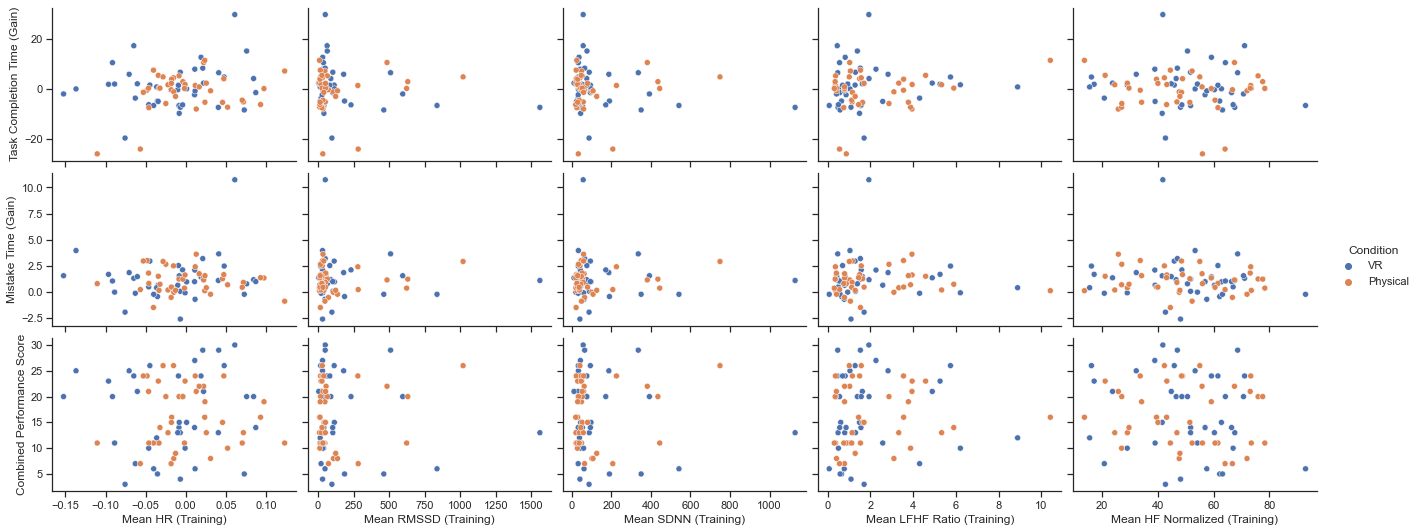

In [109]:
sns.pairplot(
    combined_results_df,
    x_vars=['Mean HR (Training)', "Mean RMSSD (Training)", "Mean SDNN (Training)", "Mean LFHF Ratio (Training)", "Mean HF Normalized (Training)"],
    y_vars=["Task Completion Time (Gain)", "Mistake Time (Gain)", "Combined Performance Score"],
    aspect=1.5,
    hue='Condition'
) 

In [116]:
print(stats.spearmanr(combined_results_df['Mean HR (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean RMSSD (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean SDNN (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean LFHF Ratio (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean HF Normalized (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))

SpearmanrResult(correlation=0.05850458655594509, pvalue=0.6108976629667172)
SpearmanrResult(correlation=-0.03605839444360134, pvalue=0.7539619659244566)
SpearmanrResult(correlation=-0.008479109273381124, pvalue=0.9412668131260696)
SpearmanrResult(correlation=0.14120441915506593, pvalue=0.21752398923783092)
SpearmanrResult(correlation=-0.1505327067861698, pvalue=0.18833699254975925)


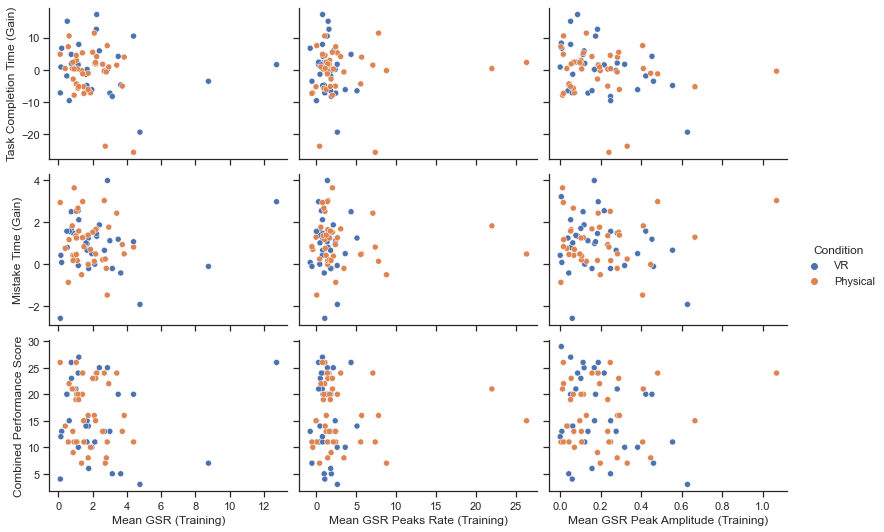

In [123]:
sns.pairplot(
    combined_results_df,
    x_vars=["Mean GSR (Training)", "Mean GSR Peaks Rate (Training)", "Mean GSR Peak Amplitude (Training)"],
    y_vars=["Task Completion Time (Gain)", "Mistake Time (Gain)", "Combined Performance Score"],
    aspect=1.5,
    hue='Condition'
) 

In [114]:
print(stats.spearmanr(combined_results_df['Mean GSR Peaks Rate (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean GSR Peak Amplitude (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df['Mean GSR (Training)'], combined_results_df['Combined Performance Score'], nan_policy='omit'))



SpearmanrResult(correlation=-0.06867114285424251, pvalue=0.5665273854679885)
SpearmanrResult(correlation=-0.13527097586876977, pvalue=0.2538443519756443)
SpearmanrResult(correlation=-0.1080683900692117, pvalue=0.36621170138204495)


## __Biosignals - High Performance Gain vs Low Performance Gain groups__

### __Mistake Time Gain__

In [18]:
#High vs low performance groups w.r.t mistake gain 
print('High vs low performance groups w.r.t mistake time gain \n--------------------------------------------------------------')
combined_results_df_high_mistake_gain = combined_results_df[combined_results_df['Mistake Time (Gain)'] > combined_results_df['Mistake Time (Gain)'].quantile(0.85)]
#print(len(combined_results_df_high_mistake_gain))
combined_results_df_low_mistake_gain = combined_results_df[combined_results_df['Mistake Time (Gain)'] < combined_results_df['Mistake Time (Gain)'].quantile(0.15)]
#print(len(combined_results_df_low_mistake_gain))

print('HR \n-----')
#HR
print("Mean of HR in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean HR (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean HR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean HR (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean HR (Training)'].dropna(), alternative = 'less')) 

#RMSSD
print("\nMean of RMSSD in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean RMSSD (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean RMSSD (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean RMSSD (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean RMSSD (Training)'].dropna(), alternative = 'less')) 

#SDNN
print("\nMean of SDNN in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean SDNN (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean SDNN (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean SDNN (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean SDNN (Training)'].dropna(), alternative = 'less')) 

#HFN
print("\nMean of HFN in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean HF Normalized (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean HF Normalized (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean HF Normalized (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean HF Normalized (Training)'].dropna(), alternative = 'less'))

#LF/HF ratio
print("\nMean of LF/HF Ratio in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean LFHF Ratio (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean LFHF Ratio (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean LFHF Ratio (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean LFHF Ratio (Training)'].dropna(), alternative = 'greater')) 

print('\nGSR \n-----')
#GSR
print("\nMean of GSR in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean GSR (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean GSR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean GSR (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean GSR (Training)'].dropna(), alternative = 'less'))

#GSR Peak amplitude
print("\nMean of GSR Peak Amplitude in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean GSR Peak Amplitude (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean GSR Peak Amplitude (Training)'].dropna(), alternative = 'less'))

#GSR peaks rate
print("\nMean of GSR peaks rate in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean GSR Peaks Rate (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean GSR Peaks Rate (Training)'].dropna(), alternative = 'less')) 

#print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Mistake_Gain'], nan_policy='omit'))
#print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Time_Gain'], nan_policy='omit'))

High vs low performance groups w.r.t mistake time gain 
--------------------------------------------------------------
HR 
-----
Mean of HR in high vs low mistake gain groups
-0.02 -0.0
Statistical significance -  MannwhitneyuResult(statistic=62.0, pvalue=0.4147237944967891)

Mean of RMSSD in high vs low mistake gain groups
168.22 178.53
Statistical significance -  MannwhitneyuResult(statistic=58.0, pvalue=0.32218657497997516)

Mean of SDNN in high vs low mistake gain groups
137.29 140.27
Statistical significance -  MannwhitneyuResult(statistic=61.0, pvalue=0.3909070017443844)

Mean of HFN in high vs low mistake gain groups
45.89 56.63
Statistical significance -  MannwhitneyuResult(statistic=40.0, pvalue=0.05827545976610699)

Mean of LF/HF Ratio in high vs low mistake gain groups
1.76 1.18
Statistical significance -  MannwhitneyuResult(statistic=91.0, pvalue=0.06579380320333426)

GSR 
-----

Mean of GSR in high vs low mistake gain groups
2.68 2.98
Statistical significance -  Mannwhitne

### __Task time Gain__

In [19]:
#High vs low performance groups w.r.t task completion time gain 
print('High vs low performance groups w.r.t task completion time gain \n--------------------------------------------------------------')
combined_results_df_high_task_time_gain = combined_results_df[combined_results_df['Task Completion Time (Gain)'] > combined_results_df['Task Completion Time (Gain)'].quantile(0.85)]
print(len(combined_results_df_high_task_time_gain))
combined_results_df_low_task_time_gain = combined_results_df[combined_results_df['Task Completion Time (Gain)'] < combined_results_df['Task Completion Time (Gain)'].quantile(0.15)]
print(len(combined_results_df_low_task_time_gain))

print('HR \n-----')
#HR
print("Mean of HR in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean HR (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean HR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean HR (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean HR (Training)'].dropna(), alternative = 'greater')) 

#RMSSD
print("\nMean of RMSSD in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean RMSSD (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean RMSSD (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean RMSSD (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean RMSSD (Training)'].dropna(), alternative = 'less')) 

#SDNN
print("\nMean of SDNN in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean SDNN (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean SDNN (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean SDNN (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean SDNN (Training)'].dropna(), alternative = 'less')) 

#HFN
print("\nMean of HFN in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean HF Normalized (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean HF Normalized (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean HF Normalized (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean HF Normalized (Training)'].dropna(), alternative = 'less'))

#LF/HF ratio
print("\nMean of LF/HF Ratio in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean LFHF Ratio (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean LFHF Ratio (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean LFHF Ratio (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean LFHF Ratio (Training)'].dropna(), alternative = 'greater')) 

print('\nGSR \n-----')
#GSR
print("\nMean of GSR in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean GSR (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean GSR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean GSR (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean GSR (Training)'].dropna(), alternative = 'less'))

#GSR Peak amplitude
print("\nMean of GSR Peak Amplitude in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean GSR Peak Amplitude (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean GSR Peak Amplitude (Training)'].dropna(), alternative = 'less'))

#GSR peaks rate
print("\nMean of GSR peaks rate in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean GSR Peaks Rate (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean GSR Peaks Rate (Training)'].dropna(), alternative = 'less')) 

#print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Mistake_Gain'], nan_policy='omit'))
#print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Time_Gain'], nan_policy='omit'))



High vs low performance groups w.r.t task completion time gain 
--------------------------------------------------------------
12
12
HR 
-----
Mean of HR in high vs low task time gain groups
0.01 -0.01
Statistical significance -  MannwhitneyuResult(statistic=86.0, pvalue=0.11504209095812556)

Mean of RMSSD in high vs low task time gain groups
81.51 288.73
Statistical significance -  MannwhitneyuResult(statistic=56.0, pvalue=0.2793799114354468)

Mean of SDNN in high vs low task time gain groups
76.55 216.39
Statistical significance -  MannwhitneyuResult(statistic=51.0, pvalue=0.18608571989106287)

Mean of HFN in high vs low task time gain groups
50.07 53.53
Statistical significance -  MannwhitneyuResult(statistic=62.0, pvalue=0.4147237944967891)

Mean of LF/HF Ratio in high vs low task time gain groups
2.09 1.42
Statistical significance -  MannwhitneyuResult(statistic=76.0, pvalue=0.2793799114354468)

GSR 
-----

Mean of GSR in high vs low task time gain groups
1.86 2.22
Statistical sig

In [122]:
#High vs low performance groups w.r.t performance score 
print('High vs low performance groups w.r.t performance score \n--------------------------------------------------------------')
high_performance_df = combined_results_df[combined_results_df['Combined Performance Score'] > combined_results_df['Combined Performance Score'].quantile(0.85)]
print(len(high_performance_df))
low_performance_df = combined_results_df[combined_results_df['Combined Performance Score'] < combined_results_df['Combined Performance Score'].quantile(0.15)]
print(len(low_performance_df))

print('HR \n-----')
#HR
print("\nMean of HR in high vs low performance groups")
print(round(high_performance_df['Mean HR (Training)'].mean(skipna=True),2), round(low_performance_df['Mean HR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean HR (Training)'].dropna(), y=low_performance_df['Mean HR (Training)'].dropna(), alternative = 'less'))

#RMSSD
print("\nMean of RMSSD in high vs low performance groups")
print(round(high_performance_df['Mean RMSSD (Training)'].mean(skipna=True),2), round(low_performance_df['Mean RMSSD (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean RMSSD (Training)'].dropna(), y=low_performance_df['Mean RMSSD (Training)'].dropna(), alternative = 'greater'))

#SDNN
print("\nMean of SDNN in high vs low performance groups")
print(round(high_performance_df['Mean SDNN (Training)'].mean(skipna=True),2), round(low_performance_df['Mean SDNN (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean SDNN (Training)'].dropna(), y=low_performance_df['Mean SDNN (Training)'].dropna(), alternative = 'greater'))

#HFN
print("\nMean of HFN in high vs low performance groups")
print(round(high_performance_df['Mean HF Normalized (Training)'].mean(skipna=True),2), round(low_performance_df['Mean HF Normalized (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean HF Normalized (Training)'].dropna(), y=low_performance_df['Mean HF Normalized (Training)'].dropna(), alternative = 'less'))

#LF/HF ratio
print("\nMean of LF/HF ratio in high vs low performance groups")
print(round(high_performance_df['Mean LFHF Ratio (Training)'].mean(skipna=True),2), round(low_performance_df['Mean LFHF Ratio (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean LFHF Ratio (Training)'].dropna(), y=low_performance_df['Mean LFHF Ratio (Training)'].dropna(), alternative = 'greater'))

print('\nGSR \n-----')
#GSR
print("\nMean of GSR in high vs low performance groups")
print(round(high_performance_df['Mean GSR (Training)'].mean(skipna=True),2), round(low_performance_df['Mean GSR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean GSR (Training)'].dropna(), y=low_performance_df['Mean GSR (Training)'].dropna(), alternative = 'greater'))

#GSR Peak amplitude
print("\nMean of GSR Peak Amplitude in high vs low performance groups")
print(round(high_performance_df['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2), round(low_performance_df['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean GSR Peak Amplitude (Training)'].dropna(), y=low_performance_df['Mean GSR Peak Amplitude (Training)'].dropna(), alternative = 'less'))

#GSR peaks rate
print("\nMean of GSR peaks rate in high vs low performance groups")
print(round(high_performance_df['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2), round(low_performance_df['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=high_performance_df['Mean GSR Peaks Rate (Training)'].dropna(), y=low_performance_df['Mean GSR Peaks Rate (Training)'].dropna(), alternative = 'less'))

High vs low performance groups w.r.t performance score 
--------------------------------------------------------------
10
12
HR 
-----

Mean of HR in high vs low performance groups
-0.01 -0.02
Statistical significance -  MannwhitneyuResult(statistic=67.0, pvalue=0.6895359280884428)

Mean of RMSSD in high vs low performance groups
203.94 201.16
Statistical significance -  MannwhitneyuResult(statistic=46.0, pvalue=0.8304895685650662)

Mean of SDNN in high vs low performance groups
163.55 158.9
Statistical significance -  MannwhitneyuResult(statistic=47.0, pvalue=0.813310987159772)

Mean of HFN in high vs low performance groups
44.15 57.16
Statistical significance -  MannwhitneyuResult(statistic=28.0, pvalue=0.018898541954359013)

Mean of LF/HF ratio in high vs low performance groups
1.97 1.28
Statistical significance -  MannwhitneyuResult(statistic=84.0, pvalue=0.06062548794036901)

GSR 
-----

Mean of GSR in high vs low performance groups
3.02 2.89
Statistical significance -  Mannwhitne

# __Self-efficacy__
---

## __Self-efficacy - Within Physical and VR__

In the VR condition, there is an increase of 0.44 in the reported self-efficacy from the pre-training phase to the post-training phase which is statistically significant (α = 0.05, p=0.016, w=120.5). While in the physical condition there is a statistically insignificant increase of 0.095 (α = 0.05, p = 0.545, w = 191.5). 

In [46]:
print('Self-efficacy means for physical condition')
print('Self efficacy 1 (Mean)', ph_results_df['Self_Efficacy_1'].mean(skipna=True), 'Self efficacy 2 (Mean)', ph_results_df['Self_Efficacy_2'].mean(skipna=True))
print("Wilcoxon test for pre and post-training self-efficacy in Physical condition")
print(stats.wilcoxon(ph_results_df['Self_Efficacy_1'], ph_results_df['Self_Efficacy_2']))

print('\nSelf-efficacy means for VR condition')
print('Self efficacy 1 (Mean)', vr_results_df['Self_Efficacy_1'].mean(skipna=True), 'Self efficacy 2 (Mean)', vr_results_df['Self_Efficacy_2'].mean(skipna=True))
print("Wilcoxon test for pre and post-training self-efficacy in VR condition")
print(stats.wilcoxon(vr_results_df['Self_Efficacy_1'], vr_results_df['Self_Efficacy_2']))

Self-efficacy means for physical condition
Self efficacy 1 (Mean) 4.358974358974359 Self efficacy 2 (Mean) 4.461538461538462
Wilcoxon test for pre and post-training self-efficacy in Physical condition
WilcoxonResult(statistic=165.0, pvalue=0.5366390114090078)

Self-efficacy means for VR condition
Self efficacy 1 (Mean) 3.75 Self efficacy 2 (Mean) 4.275
Wilcoxon test for pre and post-training self-efficacy in VR condition
WilcoxonResult(statistic=105.0, pvalue=0.011090938081077664)


## __Self-efficacy - Physical x VR__

The increase of self-efficacy in VR compared to physical is almost statistically significant (α = 0.05, p = 0.058, U = 767.5).

In [47]:

#ph_results_df['Eff_Diff'] = ph_results_df['Self_Efficacy_2'] - ph_results_df['Self_Efficacy_1']
#vr_results_df['Eff_Diff'] = vr_results_df['Self_Efficacy_2'] - vr_results_df['Self_Efficacy_1']

print('Mean self-efficacy increase for physical condition', ph_results_df['Eff_Diff'].mean(skipna=True))
print('Mean self-efficacy increase for VR condition', vr_results_df['Eff_Diff'].mean(skipna=True))
print('Statistics for self-efficacy increase between physical and VR conditions', stats.mannwhitneyu(x=ph_results_df['Eff_Diff'], y=vr_results_df['Eff_Diff'], alternative = 'less'))


Mean self-efficacy increase for physical condition 0.10256410256410256
Mean self-efficacy increase for VR condition 0.525
Statistics for self-efficacy increase between physical and VR conditions MannwhitneyuResult(statistic=601.5, pvalue=0.03441835359011643)


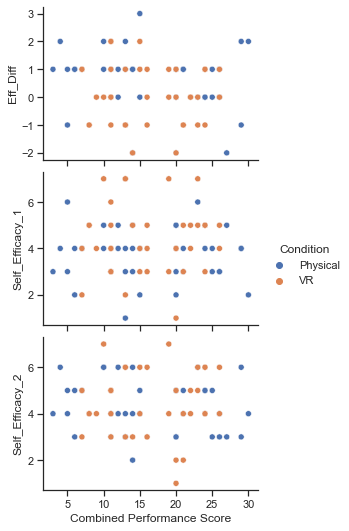

In [133]:
sns.pairplot(
    combined_results_df,
    x_vars=['Combined Performance Score'],
    y_vars=["Eff_Diff", "Self_Efficacy_1", "Self_Efficacy_2"],
    aspect=1.5,
    hue='Condition'
) 

# __NASA-TLX__
---

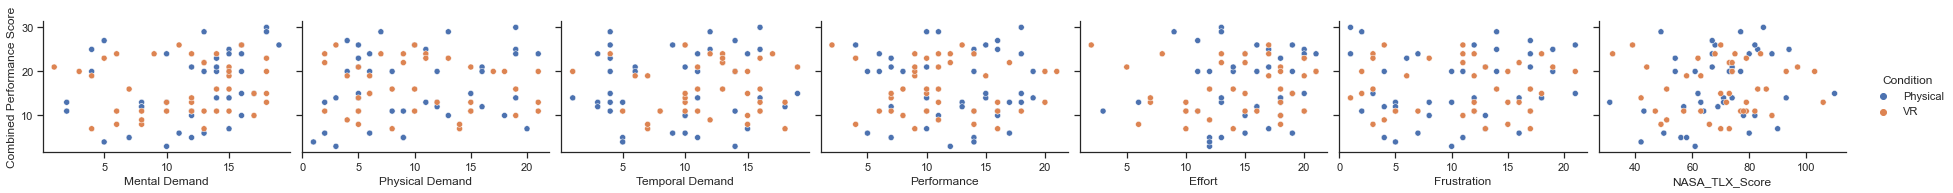

In [153]:
sns.pairplot(
    combined_results_df,
    x_vars=['Mental Demand','Physical Demand','Temporal Demand','Performance','Effort','Frustration','NASA_TLX_Score'],
    y_vars=['Combined Performance Score'],
    aspect=1.5,
    hue='Condition'
) 

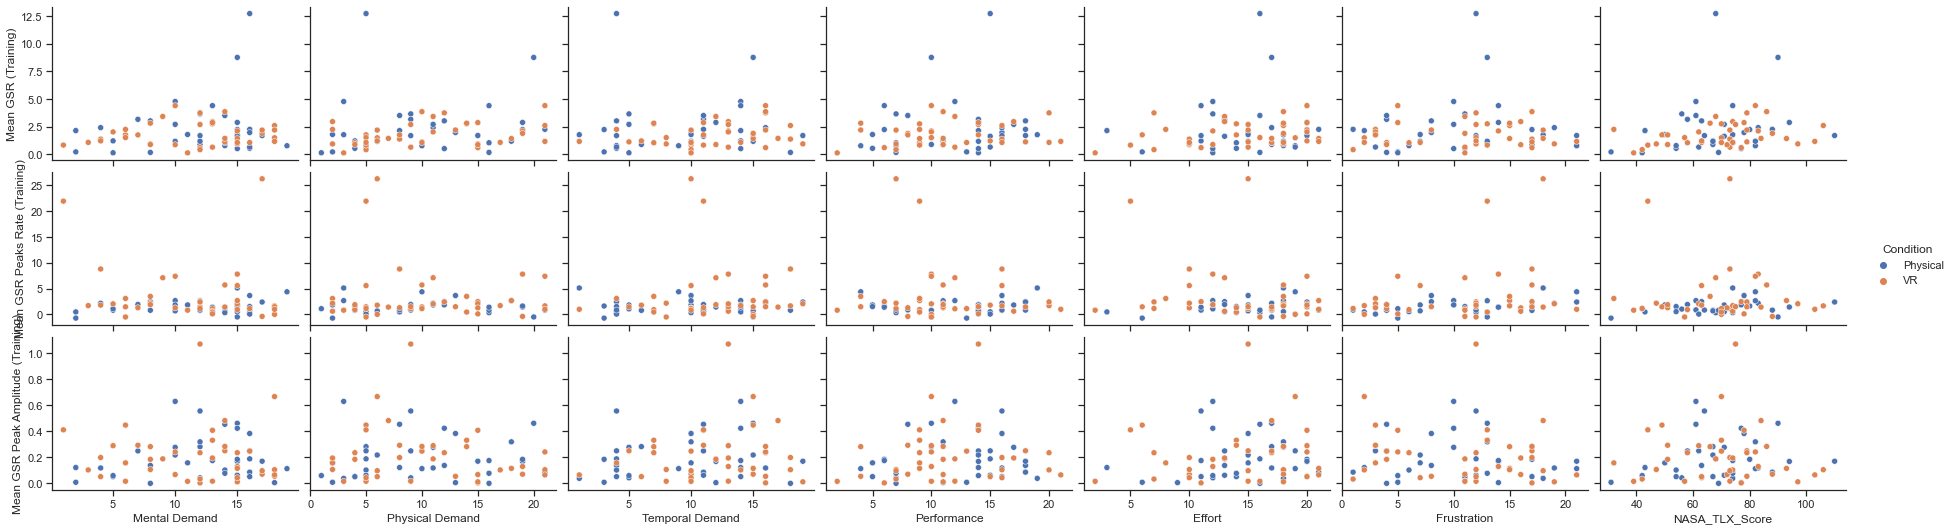

In [157]:
sns.pairplot(
    combined_results_df,
    x_vars=['Mental Demand','Physical Demand','Temporal Demand','Performance','Effort','Frustration','NASA_TLX_Score'],
    y_vars=["Mean GSR (Training)", "Mean GSR Peaks Rate (Training)", "Mean GSR Peak Amplitude (Training)"],
    aspect=1.5,
    hue='Condition'
)


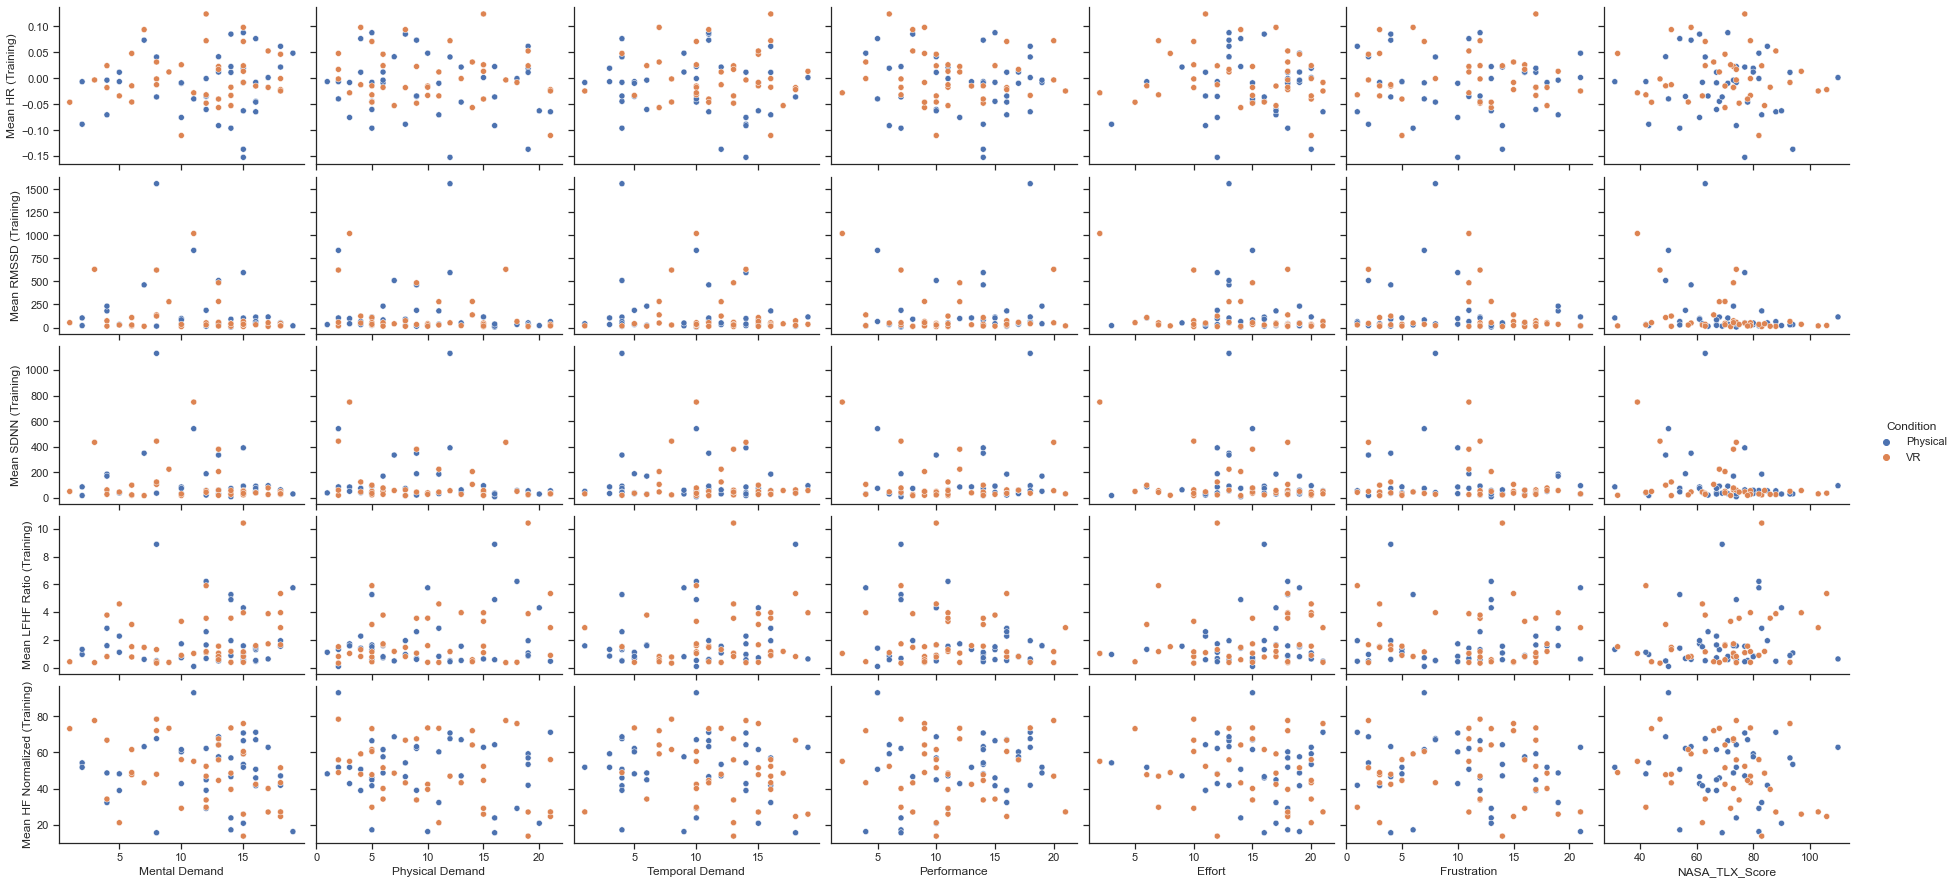

In [159]:
sns.pairplot(
    combined_results_df,
    x_vars=['Mental Demand','Physical Demand','Temporal Demand','Performance','Effort','Frustration','NASA_TLX_Score'],
    y_vars=['Mean HR (Training)', "Mean RMSSD (Training)", "Mean SDNN (Training)", "Mean LFHF Ratio (Training)", "Mean HF Normalized (Training)"],
    aspect=1.5,
    hue='Condition'
)


In [25]:
'''
ph_eff_df = pd.read_csv('..\\OnlineSurvey\\Self_Eff_Ph.csv')
ph_eff_df
print("Wilcoxon test for pre and post-training self-efficacy in Physical condition")
print(stats.wilcoxon(ph_eff_df['Eff1'], ph_eff_df['Eff2']))
'''

'\nph_eff_df = pd.read_csv(\'..\\OnlineSurvey\\Self_Eff_Ph.csv\')\nph_eff_df\nprint("Wilcoxon test for pre and post-training self-efficacy in Physical condition")\nprint(stats.wilcoxon(ph_eff_df[\'Eff1\'], ph_eff_df[\'Eff2\']))\n'

In [24]:
#ph_eff_df['Eff2'].mean(skipna=True) - ph_eff_df['Eff1'].mean(skipna=True)

In [23]:
#Draw box plot of Baseline_HR and Baseline_GSR columns in ph_results_df
#ph_results_df.boxplot(column=['Baseline_GSR', 'Pretest_GSR' , 'Norm_Level_1_GSR', 'Norm_Level_2_GSR', 'Norm_Level_3_GSR', 'Norm_Level_4_GSR', 'Norm_Posttest_GSR'], figsize=(14,10),showmeans=True)


In [ ]:
#ph_results_df.boxplot(column=['Baseline_HR', 'Pretest_HR' , 'Norm_Level_1_HR', 'Norm_Level_2_HR', 'Norm_Level_3_HR', 'Norm_Level_4_HR', 'Norm_Posttest_HR'], figsize=(14,10),showmeans=True)

In [ ]:
#ph_results_df.boxplot(column=['Pretest_Time', 'Level_1_Time', 'Level_2_Time', 'Level_3_Time', 'Level_4_Time', 'Posttest_Time'], figsize=(14,10),showmeans=True)

In [ ]:
#ph_results_df.boxplot(column=['Pretest_Mistake_Time', 'Level_1_Mistake_Time', 'Level_2_Mistake_Time', 'Level_3_Mistake_Time', 'Level_4_Mistake_Time', 'Posttest_Mistake_Time'], figsize=(14,10),showmeans=True)

In [48]:
#vr_results_df['Norm_Level_1_GSR'].hist(bins=20)

In [ ]:
#vr_results_df[vr_results_df["Norm_Level_1_GSR"].notna()]["Norm_Level_1_GSR"]

In [28]:
'''
vr_eff_df = pd.read_csv('..\\OnlineSurvey\\Self_Eff_VR.csv')
vr_eff_df
print("Wilcoxon test for pre and post-training self-efficacy in VR condition")
print(stats.wilcoxon(vr_eff_df['Eff1'], vr_eff_df['Eff2']))
'''

'\nvr_eff_df = pd.read_csv(\'..\\OnlineSurvey\\Self_Eff_VR.csv\')\nvr_eff_df\nprint("Wilcoxon test for pre and post-training self-efficacy in VR condition")\nprint(stats.wilcoxon(vr_eff_df[\'Eff1\'], vr_eff_df[\'Eff2\']))\n'

In [27]:
#vr_eff_df.describe()

In [ ]:
#vr_results_df.boxplot(column=['Baseline_GSR', 'Norm_Pretest_GSR' , 'Norm_Level_1_GSR', 'Norm_Level_2_GSR', 'Norm_Level_3_GSR', 'Norm_Level_4_GSR', 'Norm_Posttest_GSR'], figsize=(14,10),showmeans=True)
#vr_results_df.boxplot(column=['Baseline_HR', 'Norm_Pretest_HR' , 'Norm_Level_1_HR', 'Norm_Level_2_HR', 'Norm_Level_3_HR', 'Norm_Level_4_HR', 'Norm_Posttest_HR'], figsize=(14,10),showmeans=True)
#vr_results_df.boxplot(column=['Pretest_Time', 'Level_1_Time', 'Level_2_Time', 'Level_3_Time', 'Level_4_Time', 'Posttest_Time'], figsize=(10,10),showmeans=True)
#vr_results_df.boxplot(column=['Pretest_Mistake_Time', 'Level_1_Mistake_Time', 'Level_2_Mistake_Time', 'Level_3_Mistake_Time', 'Level_4_Mistake_Time', 'Posttest_Mistake_Time'], figsize=(14,10),showmeans=True)

VR vs Physical

In [29]:
#print(stats.mannwhitneyu(x=ph_eff_df['Eff_diff'], y=vr_eff_df['Eff_diff'], alternative = 'less')) 

In [30]:
#vr_results_df['Mistake_Gain'].describe()

In [31]:
#combined_results_df['Test_Score'] = 1 / np.sqrt(combined_results_df['Time_Gain'] * combined_results_df['Mistake_Gain'])

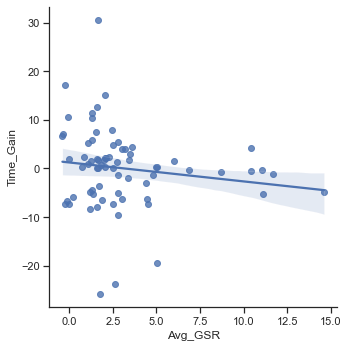

In [107]:
sns.lmplot(data=combined_results_df, x="Avg_GSR", y="Time_Gain")

In [ ]:
combined_results_df_high_HR = combined_results_df[combined_results_df['Avg_HR'] > combined_results_df['Avg_HR'].quantile(0.75)]
print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Mistake_Gain'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=0.3560371517027864, pvalue=0.14702554764788864)
SpearmanrResult(correlation=-0.09803921568627451, pvalue=0.6987424830235279)


In [ ]:
combined_results_df_low_HR = combined_results_df[combined_results_df['Avg_HR'] < combined_results_df['Avg_HR'].quantile(0.25)]
print(stats.spearmanr(combined_results_df_low_HR['Avg_HR'], combined_results_df_low_HR['Mistake_Gain'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df_low_HR['Avg_HR'], combined_results_df_low_HR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=0.12972972972972976, pvalue=0.4507871465252461)
SpearmanrResult(correlation=-0.05662805662805664, pvalue=0.7428808870113839)


In [ ]:
combined_results_df_mid_HR = combined_results_df[(combined_results_df['Avg_HR'] > combined_results_df['Avg_HR'].quantile(0.15)) & (combined_results_df['Avg_HR'] < combined_results_df['Avg_HR'].quantile(0.85))]
print(stats.spearmanr(combined_results_df_mid_HR['Avg_HR'], combined_results_df_mid_HR['Mistake_Gain'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df_mid_HR['Avg_HR'], combined_results_df_mid_HR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=0.1479471788715486, pvalue=0.3052024577818458)
SpearmanrResult(correlation=0.015702280912364946, pvalue=0.913813102725811)


In [ ]:
combined_results_df_hilo_hr = pd.concat([combined_results_df_high_HR, combined_results_df_low_HR], axis=0)
print(stats.spearmanr(combined_results_df_hilo_hr['Avg_HR'], combined_results_df_hilo_hr['Mistake_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=0.19716859716859722, pvalue=0.24906668175139635)


In [ ]:
combined_results_df_high_GSR = combined_results_df[combined_results_df['Avg_GSR'] > combined_results_df['Avg_GSR'].quantile(0.75)]
print(stats.spearmanr(combined_results_df_high_GSR['Avg_GSR'], combined_results_df_high_GSR['Mistake_Gain'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df_high_GSR['Avg_GSR'], combined_results_df_high_GSR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=-0.2507739938080495, pvalue=0.31551339595948574)
SpearmanrResult(correlation=-0.1496388028895769, pvalue=0.5534228921214378)


In [ ]:
combined_results_df_low_GSR = combined_results_df[combined_results_df['Avg_HR'] < combined_results_df['Avg_HR'].quantile(0.25)]
print(stats.spearmanr(combined_results_df_low_GSR['Avg_GSR'], combined_results_df_low_GSR['Mistake_Gain'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df_low_GSR['Avg_GSR'], combined_results_df_low_GSR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=-0.11867905056759545, pvalue=0.6390493358496443)
SpearmanrResult(correlation=-0.31475748194014447, pvalue=0.20331354771785812)


In [ ]:
combined_results_df.describe()

C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Unnamed: 0,Baseline_HR,Baseline_GSR,Pretest_Time,Pretest_Mistake_Time,Pretest_GSR,Pretest_HR,Level_1_Time,Level_1_Mistake_Time,Level_1_HR,...,Norm_Level_3_HR,Norm_Level_3_GSR,Norm_Level_4_HR,Norm_Level_4_GSR,Norm_Posttest_HR,Norm_Posttest_GSR,Time_Gain,Mistake_Gain,Avg_GSR,Avg_HR
count,40.000000,39.000000,39.000000,40.000000,40.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,32.000000,41.000000,41.000000,33.000000,33.000000
mean,19.500000,74.907976,1.638849,21.983323,3.138121,3.105645,79.636630,8.740348,0.191531,74.889141,...,72.337447,2.775583,73.225575,2.913297,76.397509,3.562960,1.340136,1.212057,2.704427,73.214653
std,11.690452,12.295171,1.222840,12.002677,1.581298,2.539813,13.241658,3.952119,0.275587,12.719334,...,13.223825,3.102874,13.303283,3.073179,13.900464,3.437163,8.460420,2.029335,3.076615,13.765000
min,0.000000,49.836066,0.388673,8.458740,0.000000,0.252664,54.466667,4.038280,0.000000,51.000000,...,48.904762,-0.391428,43.925926,-0.362710,49.055556,-0.057359,-19.471416,-2.590388,-0.398094,45.700435
25%,9.750000,66.208619,0.821497,13.955063,2.149136,1.594634,68.371528,6.028757,0.000000,65.215909,...,63.424242,1.274730,66.337838,1.586777,67.900000,1.640301,-4.778246,-0.013862,1.264140,64.848853
50%,19.500000,76.407080,1.225052,18.793420,2.962966,2.151845,79.366667,7.407319,0.092889,76.000000,...,70.578947,2.018353,70.210526,2.102728,74.566667,2.604463,1.490965,1.053452,1.879275,70.539719
75%,29.250000,84.449404,2.214465,26.257368,3.940936,3.861507,88.063235,10.465781,0.281453,83.392857,...,76.903226,2.874541,78.636364,3.075578,82.097561,3.950630,5.845163,1.688275,2.795485,78.948851
max,39.000000,96.401384,5.098206,71.426308,8.981445,10.820270,106.718750,24.004306,1.291825,101.200000,...,111.548387,14.945498,110.391304,14.350258,113.581395,14.677046,29.535441,10.733681,14.613092,111.919660


In [ ]:
print(stats.mannwhitneyu(x=vr_results_df['Avg_GSR'].dropna(), y=ph_results_df['Avg_GSR'].dropna(), alternative = 'less'))
print(stats.mannwhitneyu(x=vr_results_df['Avg_HR'].dropna(), y=ph_results_df['Avg_HR'].dropna(), alternative = 'less'))

MannwhitneyuResult(statistic=542.0, pvalue=0.12683894842626298)
MannwhitneyuResult(statistic=596.0, pvalue=0.29764869379041836)


In [ ]:
#Levene's test for equal variances
'''
print(stats.levene(ph_results_df['Norm_Pretest_HR'], vr_results_df['Norm_Pretest_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_1_HR'], vr_results_df['Norm_Level_1_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_2_HR'], vr_results_df['Norm_Level_2_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_3_HR'], vr_results_df['Norm_Level_3_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_4_HR'], vr_results_df['Norm_Level_4_HR'], center='median'))

print(stats.levene(ph_results_df['Norm_Pretest_GSR'], vr_results_df['Norm_Pretest_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_1_GSR'], vr_results_df['Norm_Level_1_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_2_GSR'], vr_results_df['Norm_Level_2_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_3_GSR'], vr_results_df['Norm_Level_3_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_4_GSR'], vr_results_df['Norm_Level_4_GSR'], center='median'))
'''

LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)


In [75]:
vr_eff_df['Condition'] = 'VR'
ph_eff_df['Condition'] = 'Physical'
combined_eff_df = pd.concat([vr_eff_df, ph_eff_df])

In [77]:
combined_eff_df
#combined_eff_df = combined_results_df[['Pretest_Mistake_Time', 'Posttest_Mistake_Time', 'Condition']].copy()
combined_eff_df.rename(columns={'Eff1': 'Pre-training', 'Eff2': 'Post-training'}, inplace=True)
combined_eff_df_long = combined_eff_df.melt(id_vars=['Condition'], var_name='Self-efficacy', value_name='Efficacy Level')
combined_eff_df_long

,Condition,Self-efficacy,Efficacy Level
0,VR,Pre-training,5
1,VR,Pre-training,5
2,VR,Pre-training,5
3,VR,Pre-training,4
4,VR,Pre-training,4
...,...,...,...
169,Physical,Post-training,3
170,Physical,Post-training,6
171,Physical,Post-training,4
172,Physical,Post-training,4


C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


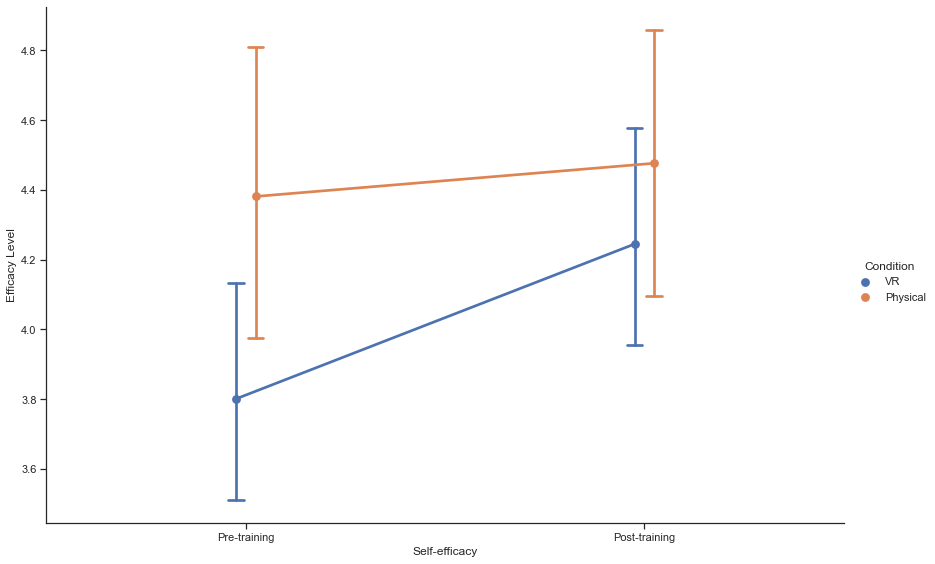

In [78]:
sns.catplot(x='Self-efficacy', y='Efficacy Level', dodge = True, hue= 'Condition', kind="point", data=combined_eff_df_long, size=8, aspect=1.5, capsize=.04)

In [35]:
vr_results_df['Condition'] = 'VR'
ph_results_df['Condition'] = 'Physical'

In [36]:
vr_results_df.columns

Index(['Unnamed: 0', 'Participant_ID', 'Baseline_HR', 'Baseline_GSR',
       'Pretest_Time', 'Pretest_Mistake_Time', 'Pretest_GSR', 'Pretest_HR',
       'Level_1_Time', 'Level_1_Mistake_Time', 'Level_1_HR', 'Level_1_GSR',
       'Level_2_Time', 'Level_2_Mistake_Time', 'Level_2_HR', 'Level_2_GSR',
       'Level_3_Time', 'Level_3_Mistake_Time', 'Level_3_HR', 'Level_3_GSR',
       'Level_4_Time', 'Level_4_Mistake_Time', 'Level_4_HR', 'Level_4_GSR',
       'Posttest_Time', 'Posttest_Mistake_Time', 'Posttest_GSR', 'Posttest_HR',
       'Condition', 'Time_Gain', 'Mistake_Gain', 'Norm_Pretest_HR',
       'Norm_Pretest_GSR', 'Norm_Level_1_HR', 'Norm_Level_1_GSR',
       'Norm_Level_2_HR', 'Norm_Level_2_GSR', 'Norm_Level_3_HR',
       'Norm_Level_3_GSR', 'Norm_Level_4_HR', 'Norm_Level_4_GSR',
       'Norm_Posttest_HR', 'Norm_Posttest_GSR', 'Avg_GSR', 'Avg_HR'],
      dtype='object')

In [65]:
combined_results_df = pd.concat([vr_results_df, ph_results_df])
#combined_results_df = combined_results_df[['Pretest_Time', 'Posttest_Time', 'Condition']].copy()
combined_results_df = combined_results_df[['Pretest_Mistake_Time', 'Posttest_Mistake_Time', 'Condition']].copy()
combined_results_df.rename(columns={'Pretest_Mistake_Time': 'Pretest', 'Posttest_Mistake_Time': 'Posttest'}, inplace=True)
combined_results_df_long = combined_results_df.melt(id_vars=['Condition'], var_name='Test', value_name='Time')

In [49]:
combined_results_df_long

,Condition,Variable,Time
0,VR,Pretest_Time,24.540540
1,VR,Pretest_Time,36.800053
2,VR,Pretest_Time,37.060505
3,VR,Pretest_Time,27.061413
4,VR,Pretest_Time,39.901130
...,...,...,...
157,Physical,Posttest_Time,18.503739
158,Physical,Posttest_Time,22.779398
159,Physical,Posttest_Time,18.156550
160,Physical,Posttest_Time,40.977314


C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


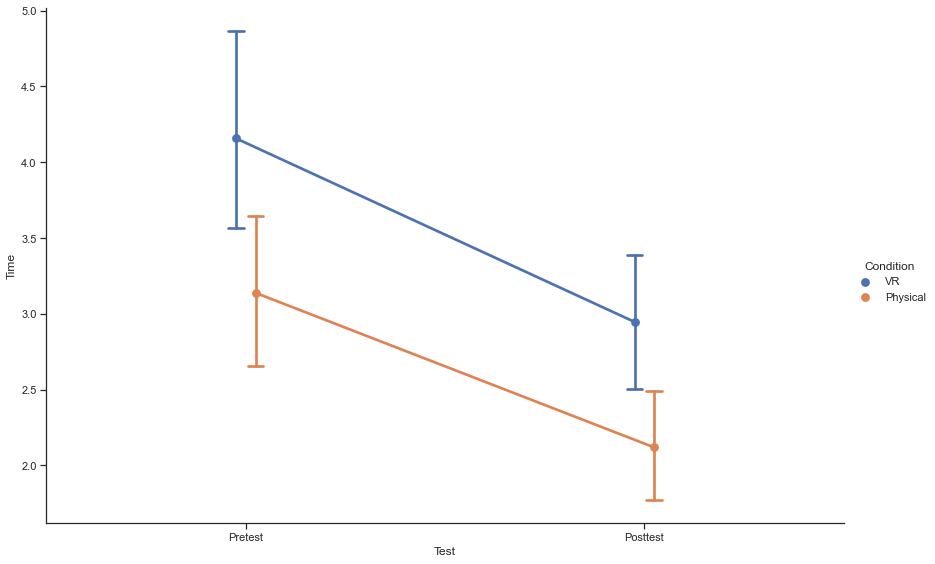

In [66]:
sns.catplot(x='Test', y='Time', dodge = True, hue= 'Condition', kind="point", data=combined_results_df_long, size=8, aspect=1.5, capsize=.04)

In [18]:
vr_nasatlx_df = pd.read_csv('..\\OnlineSurvey\\VR_Nasa.csv')
ph_nasatlx_df = pd.read_csv('..\\OnlineSurvey\\Ph_Nasa.csv')
vr_nasatlx_df['Condition'] = 'VR'
ph_nasatlx_df['Condition'] = 'Physical'
nasatlx_df = pd.concat([vr_nasatlx_df, ph_nasatlx_df])
nasatlx_df_long = nasatlx_df.melt(id_vars=['Condition'], var_name='Variable', value_name='Level')
nasatlx_df_long

,Condition,Variable,Level
0,VR,Mental Demand,13
1,VR,Mental Demand,12
2,VR,Mental Demand,8
3,VR,Mental Demand,8
4,VR,Mental Demand,18
...,...,...,...
517,Physical,Frustration,17
518,Physical,Frustration,2
519,Physical,Frustration,11
520,Physical,Frustration,3


C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


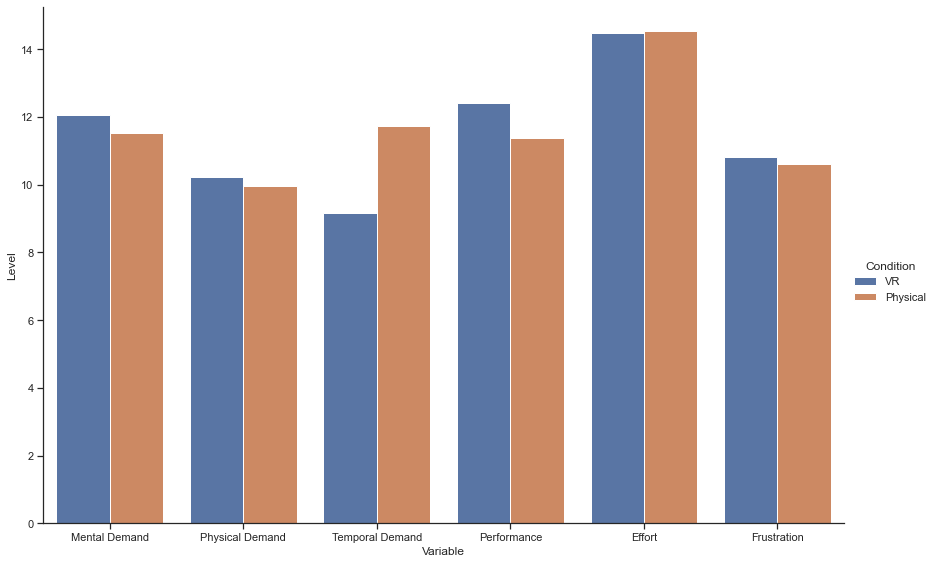

In [68]:

sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=nasatlx_df_long, size=8, aspect=1.5, ci = None)

In [ ]:
ph_nasatlx_df['Frustration'].describe()

count    42.000000
mean     10.619048
std       5.656649
min       1.000000
25%       5.000000
50%      12.000000
75%      15.000000
max      21.000000
Name: Frustration, dtype: float64

In [ ]:
print("Mann Whitney U test for Mental Demand in VR vs physical")
print(stats.mannwhitneyu(x=ph_nasatlx_df['Mental Demand'], y=vr_nasatlx_df['Mental Demand']))
print("Mann Whitney U test for Physical Demand in VR vs physical")
print(stats.mannwhitneyu(x=ph_nasatlx_df['Physical Demand'], y=vr_nasatlx_df['Physical Demand']))
print("Mann Whitney U test for Temporal Demand in VR vs physical")
print(stats.mannwhitneyu(x=ph_nasatlx_df['Temporal Demand'], y=vr_nasatlx_df['Temporal Demand']))
print("Mann Whitney U test for Performance in VR vs physical")
print(stats.mannwhitneyu(x=ph_nasatlx_df['Performance'], y=vr_nasatlx_df['Performance']))
print("Mann Whitney U test for Effort in VR vs physical")
print(stats.mannwhitneyu(x=ph_nasatlx_df['Effort'], y=vr_nasatlx_df['Effort']))
print("Mann Whitney U test for Frustration in VR vs physical")
print(stats.mannwhitneyu(x=ph_nasatlx_df['Frustration'], y=vr_nasatlx_df['Frustration']))


Mann Whitney U test for Mental Demand in VR vs physical
MannwhitneyuResult(statistic=874.0, pvalue=0.5476396506501511)
Mann Whitney U test for Physical Demand in VR vs physical
MannwhitneyuResult(statistic=915.0, pvalue=0.8017537172432971)
Mann Whitney U test for Temporal Demand in VR vs physical
MannwhitneyuResult(statistic=1240.0, pvalue=0.012120548114918736)
Mann Whitney U test for Performance in VR vs physical
MannwhitneyuResult(statistic=802.0, pvalue=0.22471942196316996)
Mann Whitney U test for Effort in VR vs physical
MannwhitneyuResult(statistic=973.0, pvalue=0.814670863592921)
Mann Whitney U test for Frustration in VR vs physical
MannwhitneyuResult(statistic=922.5, pvalue=0.8514775130430722)


In [ ]:
#Create a dataframe with the mean values of each column in the ph_nasatlx_df and vr_nasatlx_df
#nasatlx_df = pd.DataFrame(columns=['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration'])
#nasatlx_df = nasatlx_df.append(pd.DataFrame([[ph_nasatlx_df['Mental Demand'].mean(), ph_nasatlx_df['Physical Demand'].mean(), ph_nasatlx_df['Temporal Demand'].mean(), ph_nasatlx_df['Performance'].mean(), ph_nasatlx_df['Effort'].mean(), ph_nasatlx_df['Frustration'].mean()]], columns=['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration'], index=['PH'] ))
#nasatlx_df = nasatlx_df.append(pd.DataFrame([[vr_nasatlx_df['Mental Demand'].mean(), vr_nasatlx_df['Physical Demand'].mean(), vr_nasatlx_df['Temporal Demand'].mean(), vr_nasatlx_df['Performance'].mean(), vr_nasatlx_df['Effort'].mean(), vr_nasatlx_df['Frustration'].mean()]], columns=['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration'], index=['VR'] ))

In [ ]:
#nasatlx_df

,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration
PH,11.523810,9.952381,11.714286,11.380952,14.523810,10.619048
VR,12.066667,10.222222,9.155556,12.400000,14.488889,10.822222


In [4]:
import neurokit2 as nk

# Download example data
data = nk.data("bio_eventrelated_100hz")

# Preprocess the data (filter, find peaks, etc.)
processed_data, info = nk.bio_process(ecg=data["ECG"], rsp=data["RSP"], eda=data["EDA"], sampling_rate=100)

# Compute relevant features
results = nk.bio_analyze(processed_data, sampling_rate=100)

C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


In [9]:
results.columns

Index(['ECG_Rate_Mean', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_SDANN1', 'HRV_SDNNI1',
       'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_RMSSD',
       ...
       'SCR_Peaks_N', 'SCR_Peaks_Amplitude_Mean', 'RSA_P2T_Mean',
       'RSA_P2T_Mean_log', 'RSA_P2T_SD', 'RSA_P2T_NoRSA', 'RSA_PorgesBohrer',
       'RSA_Gates_Mean', 'RSA_Gates_Mean_log', 'RSA_Gates_SD'],
      dtype='object', length=113)